## Predicting Credit Loan Default

In this project we hope to solve the problem of default rates by creating a high quality predictive model which can use previous loan payment data to approximate if an individual will default on their payment next month. We will use a number of classification models to pick the most accurate.

*Data source with key info in repository

In [2]:
#import our usual data science toolkit
#create dataframes
import pandas as pd
#math problems
import numpy as np
#visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import our credit default data: source UT Data Analytics Course
credit = pd.read_csv('creditdefaults.csv', header =1)

Let's start with some initial data exploration to get to know our data

In [14]:
#Note default payment: 0=no default, 1=default
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [12]:
#We will go ahead and do some early feature selection and drop the ID value to avoid problems in the future
credit = credit.drop('ID', 1)

In [13]:
credit.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [140]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int32
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [16]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')


In [19]:
credit.isnull().sum(axis=0)

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

Let's start visualizing some of our data to understand it better

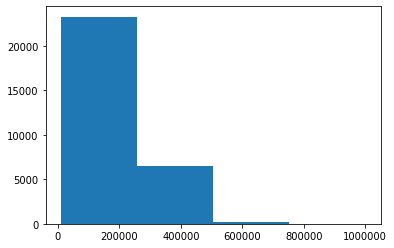

In [55]:
#Let's make a histogram of the limit balance
plt.hist(credit['LIMIT_BAL'], bins=4)
plt.show()

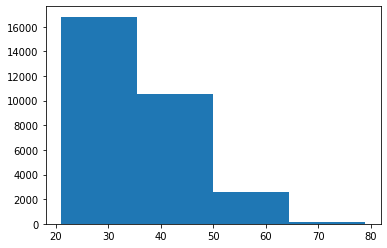

In [53]:
#We can do the same for age making sure we bin the data to report consistently
plt.hist(credit['AGE'], bins = 4)
plt.show()

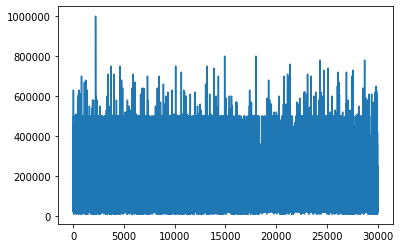

In [24]:
plt.plot(credit['LIMIT_BAL'])
plt.show()

In [42]:
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.tools as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

Let's take a close look at the relationship between age and default of credit

In [134]:
df_good = credit.loc[credit['default payment next month'] == 0]['AGE'].values.tolist()
df_bad = credit.loc[credit['default payment next month'] == 1]['AGE'].values.tolist()
df_age = credit['AGE'].values.tolist()

#First plot
trace0 = go.Histogram(
    x=df_good,
    histnorm='probability',
    name="Good Credit"
)
#Second plot
trace1 = go.Histogram(
    x=df_bad,
    histnorm='probability',
    name="Bad Credit"
)
#Third plot
trace2 = go.Histogram(
    x=df_age,
    histnorm='probability',
    name="Overall Age"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

C:\Users\ovall\Anaconda3\lib\site-packages\plotly\tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



Let's look at the differences in default by gender

Note on gender (1 = male, 2 = female)

In [135]:
#First plot
trace0 = go.Bar(
    x = credit[credit['default payment next month']== 0]['SEX'].value_counts().index.values,
    y = credit[credit['default payment next month']== 0]['SEX'].value_counts().values,
    name='Good credit'
)
                      
#First plot 2
trace1 = go.Bar(
    x = credit[credit['default payment next month']== 1]['SEX'].value_counts().index.values,
    y = credit[credit['default payment next month']== 1]['SEX'].value_counts().values,
    name='Bad credit'
)

#Second plot
trace2 = go.Box(
    x = credit[credit['default payment next month']== 0]['SEX'],
    y = credit[credit['default payment next month']== 0]['LIMIT_BAL'],
    name=trace0.name
)

#Second plot 2
trace3 = go.Box(
    x = credit[credit['default payment next month']== 1]['SEX'],
    y = credit[credit['default payment next month']== 1]['LIMIT_BAL'],
    name=trace1.name
)

data = [trace0, trace1, trace2,trace3]


fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('Gender Count', 'Credit Amount by Gender'))

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 1, 2)
fig.append_trace(trace3, 1, 2)

fig['layout'].update(height=400, width=800, title='Gender Distribuition', boxmode='group')
py.iplot(fig, filename='sex-subplot')

Let's make a correlation matrix to reign in the info on history of past payment, amount on bill statement, and amount of previous payment. This way we can assert what to focus on since it seems convoluted at the moment.

In [156]:
corrMat = credit.corr()
print(corrMat)

                            LIMIT_BAL       SEX  EDUCATION  MARRIAGE  \
LIMIT_BAL                    1.000000  0.024755  -0.219161 -0.108139   
SEX                          0.024755  1.000000   0.014232 -0.031389   
EDUCATION                   -0.219161  0.014232   1.000000 -0.143464   
MARRIAGE                    -0.108139 -0.031389  -0.143464  1.000000   
AGE                          0.144713 -0.090874   0.175061 -0.414170   
PAY_0                       -0.271214 -0.057643   0.105364  0.019917   
PAY_2                       -0.296382 -0.070771   0.121566  0.024199   
PAY_3                       -0.286123 -0.066096   0.114025  0.032688   
PAY_4                       -0.267460 -0.060173   0.108793  0.033122   
PAY_5                       -0.249411 -0.055064   0.097520  0.035629   
PAY_6                       -0.235195 -0.044008   0.082316  0.034345   
BILL_AMT1                    0.285430 -0.033642   0.023581 -0.023472   
BILL_AMT2                    0.278314 -0.031183   0.018749 -0.02

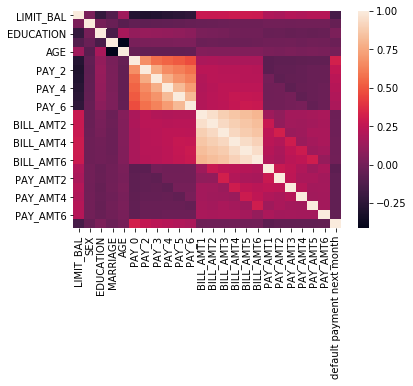

In [157]:
sns.heatmap(corrMat)

Seems like defaut payment is positively influenced by the repayment status, meaning the longer the repayment is delayed the higher chance of default. There is a strong negative correlation between the amount paid and the default meaning the higher their payments, the less likely they are to default. Bill amount seemed to be neutral so no strong correlation either way.

Let's take a look at a covariance matrix to just get another perspective on how the variables may be related i.e. how changes in one variable are associated with those in another variable.

In [159]:
covMat = credit.cov()
print(covMat)

                               LIMIT_BAL          SEX     EDUCATION  \
LIMIT_BAL                   1.683446e+10  1571.050630 -22474.028945   
SEX                         1.571051e+03     0.239247      0.005502   
EDUCATION                  -2.247403e+04     0.005502      0.624651   
MARRIAGE                   -7.323670e+03    -0.008014     -0.059184   
AGE                         1.730767e+05    -0.409726      1.275380   
PAY_0                      -3.954593e+04    -0.031685      0.093584   
PAY_2                      -4.603765e+04    -0.041442      0.115025   
PAY_3                      -4.443225e+04    -0.038694      0.107861   
PAY_4                      -4.057181e+04    -0.034411      0.100528   
PAY_5                      -3.667056e+04    -0.030521      0.087340   
PAY_6                      -3.509308e+04    -0.024754      0.074816   
BILL_AMT1                   2.727020e+09 -1211.694332   1372.377644   
BILL_AMT2                   2.570130e+09 -1085.595467   1054.657595   
BILL_A

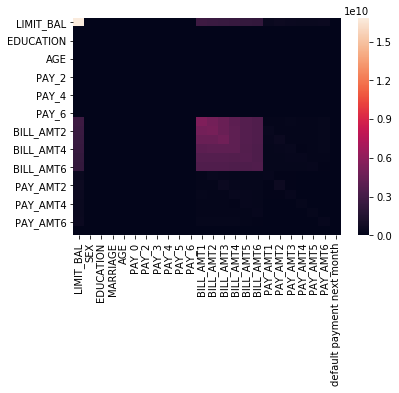

In [160]:
sns.heatmap(covMat)

We can see clearly that the amount on the bill statement most linearly affects the amount of the bill the next month.

## Feature Selection

Let's drop the column variables attributing the amount on the bill statement. They showed very low correlation to the default of payment overrall.

In [167]:
data = credit.drop(columns = ['BILL_AMT1', 'BILL_AMT2' , 'BILL_AMT3' , 'BILL_AMT4' , 'BILL_AMT5' , 'BILL_AMT6'])

In [169]:
X = data.iloc[:,0:17]
print('Summary of feature sample')
X.head()

Summary of feature sample


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,2,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,0,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,0,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,0,2000,36681,10000,9000,689,679


In [170]:
y = data['default payment next month']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

## Modeling our data

Let's import our packages for machine learning. We're going to be using a few packages from sci-kit learn to build our regression models

In [179]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import linear_model

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 123)

In [187]:
SVC = SVC()
RF = RandomForestClassifier(n_estimators = 100)
KN = KNeighborsClassifier()

In [188]:
modelsvc = SVC.fit(X_train, y_train)
svcpredict = modelsvc.predict(X_test)

In [189]:
accuracy_score(y_test, svcpredict)

0.7830666666666667

In [195]:
print(cross_val_score(modelsvc, X_train, y_train)) 

[0.77755556 0.77733333 0.77733333 0.77733333 0.77733333]


In [190]:
modelrf = RF.fit(X_train, y_train)
rfpredict = modelrf.predict(X_test)

In [191]:
accuracy_score(y_test, rfpredict)

0.8146666666666667

In [194]:
print(cross_val_score(modelrf, X_train, y_train)) 

[0.81311111 0.812      0.81844444 0.82311111 0.81577778]


In [192]:
modelkn = KN.fit(X_train, y_train)
knpredict = modelkn.predict(X_test)

In [193]:
accuracy_score(y_test, knpredict)

0.7602666666666666

In [196]:
print(cross_val_score(modelkn, X_train, y_train)) 

[0.74622222 0.75911111 0.75288889 0.75777778 0.75044444]


Cool. So it looks like our Random Forest scored the best this time around. An accuracy of 81%  will do for the purposes of this exercise. Next time it would be interesting to use some deep learning models for this classification problem and see if we can improve our score!